# (Loan Data from Prosper)
## by (Shimaa M. Badawy)

## Preliminary Wrangling

> The dataset includes data related to loan proposers such as the amount of loan they have taken, the proposer's rate and the loan status

In [24]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [25]:
# load in the dataset
DF = pd.read_csv('prosperLoanData.csv')

In [26]:
# Exploring dataset
print(DF.shape)
print(DF.dtypes)
print(DF.head(10))
print(DF.info())

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


### What is the structure of your dataset?

> There are 113937 entries in the dataset with 81 columns.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting if the loan will be completed
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  I expect that BorrowerRate and LoanOriginalAmount will have the strongest effect on whether the loan is completed or not

### Cleaning 

In [27]:
#Cleaning data by removing nulls if any
DFProsperRatingsCleaned = DF.dropna(subset=['BorrowerRate','LoanOriginalAmount', 'LoanStatus'])

# get the diffrent values of LoanStatus to map them to a numeric values
DFProsperRatingsCleaned["LoanStatus"].unique() 

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [28]:
# Create a new column with the numeric categories of LoanStatus
diffLoanStatus = {"Completed":1, "Current":2, "Defaulted":3, "Chargedoff":4, "Cancelled":5, "FinalPaymentInProgress":6,
                  "Past Due (1-15 days)":7, "Past Due (16-30 days)":8, "Past Due (31-60 days)":9, "Past Due (61-90 days)":10,
                  "Past Due (91-120 days)":11, "Past Due (>120 days)":12}
DFProsperRatingsCleaned=DF.copy()
DFProsperRatingsCleaned["LoanStatusNumeric"] = [diffLoanStatus[status] for status in DFProsperRatingsCleaned["LoanStatus"] ]

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

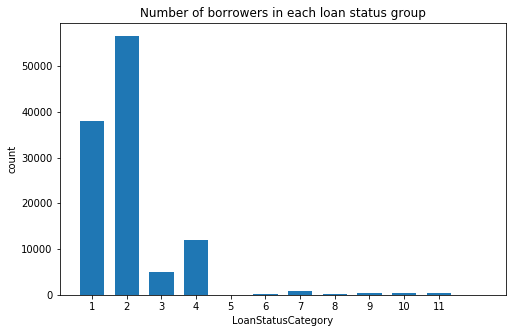

In [29]:
# Plotting histogram for Loan Status
bin_edges = np.arange(0.5, 12.5+1, 1)
plt.figure(figsize=[8, 5])
plt.xticks(range(12))
plt.hist(data = DFProsperRatingsCleaned, x = 'LoanStatusNumeric',bins=bin_edges, rwidth = 0.7)
plt.xlabel('LoanStatusCategory')
plt.ylabel('count')
plt.title("Number of borrowers in each loan status group")
plt.show()

> The most domenant loan status is **"Current"** and after it the loan status **"Complete"**

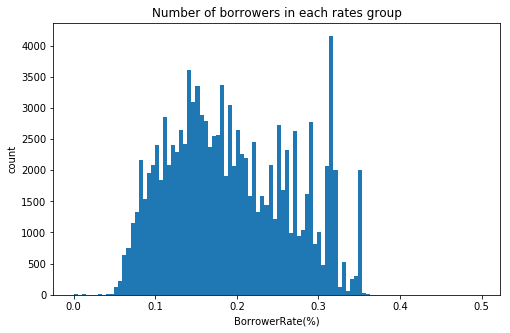

In [30]:
# Plotting a histogram for BorrowerRate
bins = np.arange(0, DFProsperRatingsCleaned['BorrowerRate'].max()+1, 1)

plt.figure(figsize=[8, 5])
plt.xticks(range(12))
plt.hist(data = DFProsperRatingsCleaned, x = 'BorrowerRate',bins = 100)
plt.xlabel('BorrowerRate(%)')
plt.xticks([0, .1, .2, .3, .4, .5])
plt.title("Number of borrowers in each rates group")
plt.ylabel('count')
plt.show()

> The distrubution of BorrowerRate histogram have a peek of aproximatly **4500**.

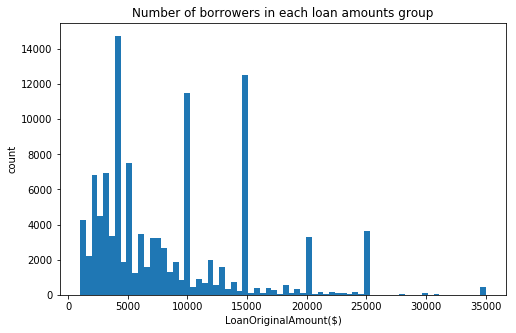

In [31]:
# LoanOriginalAmount
# Plotting the distribution of Loan Original Amount

binsize = 70

plt.figure(figsize=[8, 5])
plt.hist(data = DFProsperRatingsCleaned, x = 'LoanOriginalAmount', bins=binsize)
plt.xlabel('LoanOriginalAmount($)')
plt.title("Number of borrowers in each loan amounts group")
plt.ylabel('count')
plt.show()

> From the graphs above, we can see that top loans amounts are approximatly **(4000,15000,10000)**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> No

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For the loanStatus I had to map the text values to numeric categorical values. Also make sure there are no Nans in data.

# Bivariate Exploration

In [32]:
numeric_vars = ['BorrowerRate', 'LoanOriginalAmount']

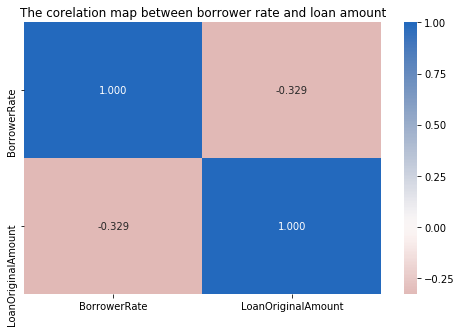

In [33]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(DFProsperRatingsCleaned[numeric_vars].corr(), annot = True , fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title("The corelation map between borrower rate and loan amount")
plt.show()

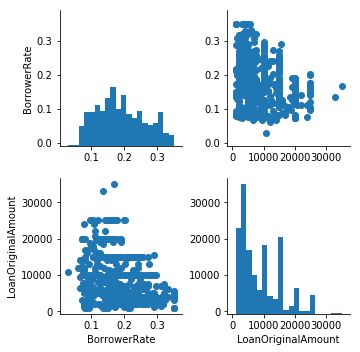

In [34]:
# plot matrix
samples = np.random.choice(DFProsperRatingsCleaned.shape[0], 500, replace = False)
samp1 = DFProsperRatingsCleaned.loc[samples,:]

g = sb.PairGrid(data = samp1, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

> It seems that there is no stronge corelation between loan amount and borrower rate

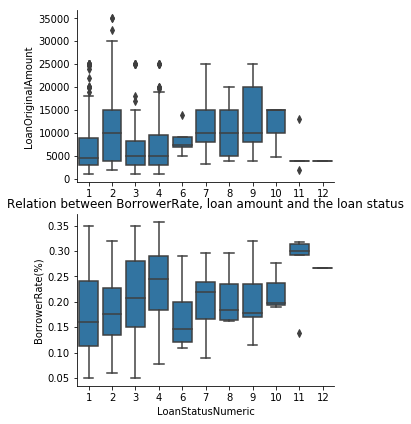

In [35]:
# plot matrix of numeric features against categorical features.

samples = np.random.choice(DFProsperRatingsCleaned.shape[0], 2000, replace = False)
samp = DFProsperRatingsCleaned.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = samp, y_vars = ['LoanOriginalAmount','BorrowerRate'], x_vars = ['LoanStatusNumeric'],
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.ylabel('BorrowerRate(%)')
plt.title("Relation between BorrowerRate, loan amount and the loan status")
plt.show();

> The Loans with status 1 (Completed) seems to have the least loan amount

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a small corelation between 'BorrowerRate' and 'LoanOriginalAmount'

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No!

# Multivariate Exploration

In [36]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

In [37]:
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

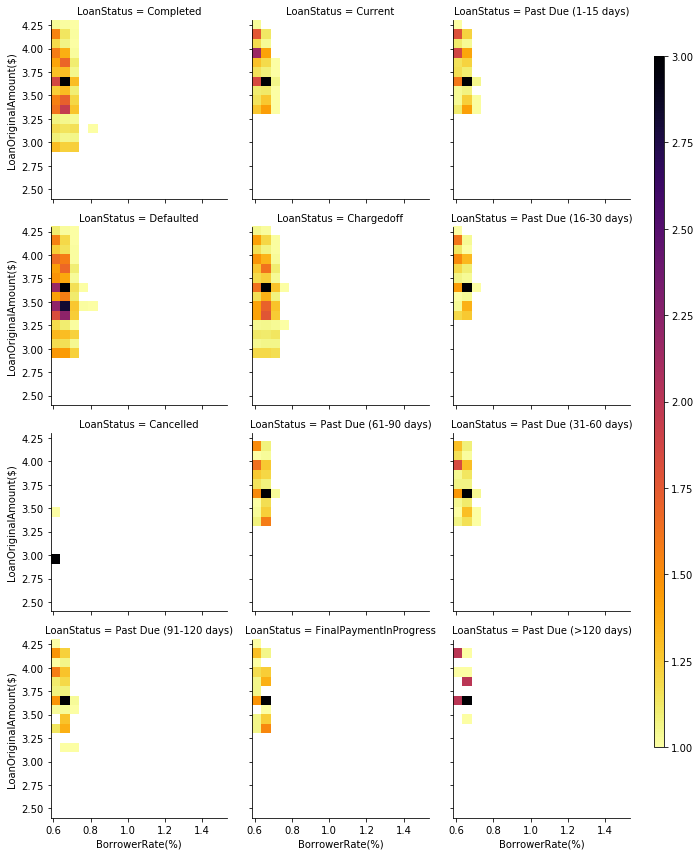

In [40]:
# create faceted heat maps on levels of the LoanStatus variable

def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(cuberoot_trans(.2), cuberoot_trans(3.5)+.05, .05)
    bins_y = np.arange(2.4, 4.3+0.1, 0.1)
    plt.xlim([0.4,1])
    h= plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    
DFProsperRatingsCleaned['BorrowerRateQR']= cuberoot_trans (DFProsperRatingsCleaned['BorrowerRate'])
DFProsperRatingsCleaned['LoanOriginalAmountLog'] = log_trans (DFProsperRatingsCleaned['LoanOriginalAmount'])

g = sb.FacetGrid(data = DFProsperRatingsCleaned, col = 'LoanStatus', col_wrap = 3, size = 3)
g= g.map(hist2dgrid, 'BorrowerRateQR', 'LoanOriginalAmountLog', color = 'inferno_r')

cbar_ax = g.fig.add_axes([1.015,0.13, 0.015, 0.8])
plt.colorbar(cax=cbar_ax)

g.set_xlabels('BorrowerRate(%)')
g.set_ylabels('LoanOriginalAmount($)')

plt.show()

> The completed loans are for borrowers who have rating between approximatly 0 and 0.4, and loan amount between between 700 to 15K. And most of completed loans have amount of approximatly 4K

In [182]:
#Select a range of borrowers' ratings 
BorrowerRateLoans = DFProsperRatingsCleaned[DFProsperRatingsCleaned['BorrowerRate']>.35]

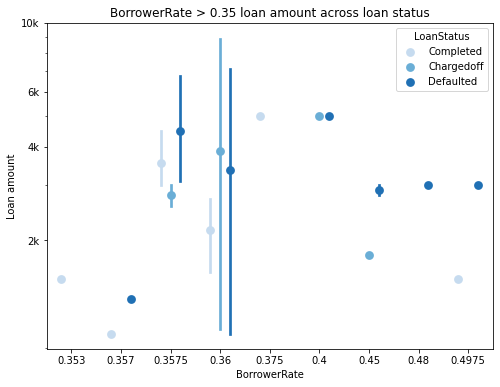

In [183]:
#Plotting the relation between BorrowerRate (>0.35), LoanOriginalAmount and LoanStatus
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = BorrowerRateLoans, x = 'BorrowerRate', y = 'LoanOriginalAmount', hue = 'LoanStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('BorrowerRate > 0.35 loan amount across loan status')
plt.ylabel('Loan amount')
plt.xlabel('BorrowerRate (%)')
plt.yscale('log')
plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

> Most of the borrowers who have a rate above .35 have a loan status = Defaulted

In [46]:
#Select a range of borrowers' ratings 
BorrowerRateLoans = DFProsperRatingsCleaned[DFProsperRatingsCleaned['BorrowerRate']>.347]
BorrowerRateLoans = BorrowerRateLoans[BorrowerRateLoans['BorrowerRate']<.35]

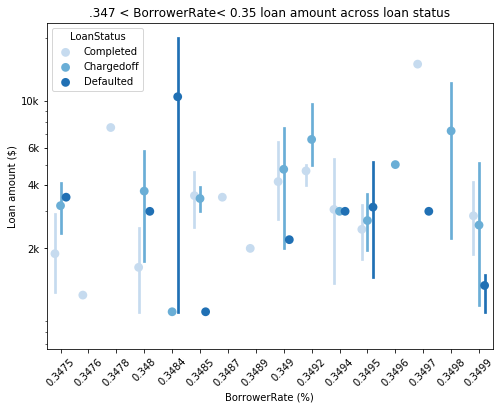

In [49]:
#Plotting the relation between BorrowerRate (>0.35), LoanOriginalAmount and LoanStatus
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = BorrowerRateLoans, x = 'BorrowerRate', y = 'LoanOriginalAmount', hue = 'LoanStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('.347 < BorrowerRate< 0.35 loan amount across loan status')
plt.ylabel('Loan amount ($)')
plt.xlabel('BorrowerRate (%)')
plt.yscale('log')
plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
plt.xticks(rotation=45)
ax.set_yticklabels([],minor = True)
plt.show();

> in borrowersrate between .347 and .35 there is few group of borrowers who have the past due > 91 Days or having the final payment in progress 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From this investegation it seems that the relation between LoanOriginalAmount and LoanStatusNumeric is weak so  for LoanStatusNumeric and BorrowerRate

### Were there any interesting or surprising interactions between features?

> Surprisingly completing the loan is weakly related to Loan amount and borrower rate